In [1]:
%load_ext autoreload
%autoreload 2

In [18]:
import sys
from pathlib import Path
sys.path.append("../iclr_17_compression/")
import torch
from test_model import plot_tensor
import random as rd
from torchvision import transforms
import numpy as np
import matplotlib.pyplot as plt

In [19]:
path_to_covers = Path("../JIN_SRNet/BossBase-1.01-cover/")
path_to_stego = Path("../JIN_SRNet/stego_001bit/")

cover_files = list(path_to_covers.glob("*.pt"))
stego_files = list(path_to_stego.glob("*.pt")) #we use glob because there is a txt file in stego folder

torch.Size([1, 3, 512, 512])
tensor([[[[0.4963, 0.4939, 0.4937,  ..., 0.5095, 0.5107, 0.5041],
          [0.4955, 0.4936, 0.4944,  ..., 0.5076, 0.5111, 0.5093],
          [0.4947, 0.4922, 0.4946,  ..., 0.5066, 0.5101, 0.5099],
          ...,
          [0.3442, 0.3459, 0.3604,  ..., 0.3515, 0.3558, 0.3457],
          [0.3493, 0.3537, 0.3677,  ..., 0.3460, 0.3497, 0.3405],
          [0.3515, 0.3633, 0.3820,  ..., 0.3414, 0.3447, 0.3410]],

         [[0.4914, 0.4927, 0.4930,  ..., 0.5081, 0.5080, 0.5011],
          [0.4943, 0.4959, 0.4963,  ..., 0.5111, 0.5116, 0.5094],
          [0.4954, 0.4948, 0.4962,  ..., 0.5092, 0.5094, 0.5093],
          ...,
          [0.3435, 0.3509, 0.3637,  ..., 0.3495, 0.3518, 0.3398],
          [0.3466, 0.3567, 0.3685,  ..., 0.3426, 0.3438, 0.3324],
          [0.3476, 0.3647, 0.3827,  ..., 0.3365, 0.3370, 0.3307]],

         [[0.4915, 0.4941, 0.4939,  ..., 0.5092, 0.5080, 0.4997],
          [0.4941, 0.4959, 0.4959,  ..., 0.5144, 0.5145, 0.5113],
          [0.

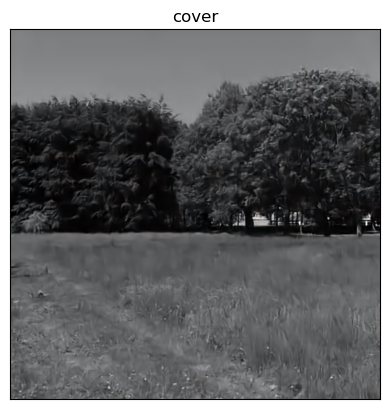

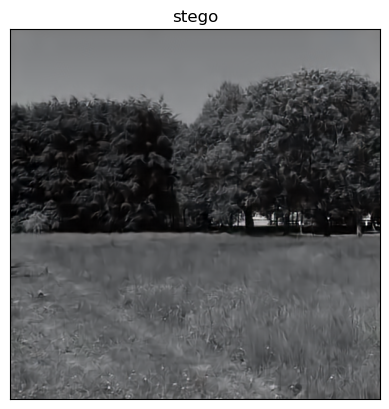

In [25]:
id_random = rd.randint(0,len(cover_files))
cover_file = list(path_to_covers.glob(f"*{id_random}*.pt"))[0]
stego_file = list(path_to_stego.glob(f"*{id_random}*.pt"))[0]

cover_t = torch.load(cover_file)
stego_t = torch.load(stego_file) 
print(cover_t.shape)
print(cover_t)
plot_tensor(cover_t,"cover")
plot_tensor(stego_t,"stego")

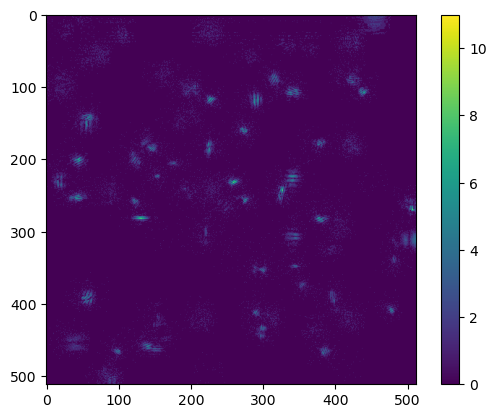

In [26]:
to_pil = transforms.ToPILImage()

cover_np = np.array(to_pil(cover_t[0])).astype(int)
stego_np = np.array(to_pil(stego_t[0])).astype(int)

diff = np.abs(cover_np - stego_np)
plt.imshow(diff[:,:,0])
plt.colorbar()